In [1]:
from functions_for_all_nutrients import *

In [2]:
username = !whoami
username

['alibow']

In [3]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = [2,3,4,5]
sex_ids = [1,2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]

In [4]:
nutrients = ['vitamin a','zinc','iron','folic acid']
vehicles = ['oil','wheat flour','maize flour']

In [5]:
coverage_data_dir = f'/ihme/homes/{username[0]}/notebooks/vivarium_research_lsff/data_prep/outputs/lsff_input_coverage_data.csv'

In [6]:
location_ids = pd.read_csv(coverage_data_dir).location_id.unique()
location_ids

array([161, 201, 202, 205, 171, 179, 163,  11, 180, 184,  15, 164, 214,
       165, 196, 190, 189,  20])

In [7]:
coverage_u5 = pd.DataFrame()
for nutrient in nutrients:
    if nutrient == 'vitamin a':
        vehicles = ['oil']
    else:
        vehicles = ['wheat flour', 'maize flour']
    for vehicle in vehicles:
        print(f'calculating {nutrient}/{vehicle}')
        cov_a, cov_b = generate_logical_coverage_draws(coverage_data_dir, location_ids, nutrient, vehicle)
        baseline_coverage, counterfactual_coverage = generate_coverage_dfs(cov_a, cov_b, [2021,2025], coverage_levels)
        baseline_coverage['coverage_level'] = 'baseline'
        cov_b['coverage_level'] = 'maximum'
        coverage = pd.concat([baseline_coverage.reset_index(),
                              counterfactual_coverage.reset_index(),
                              cov_b.reset_index()], ignore_index=True)
        coverage['nutrient'] = nutrient
        coverage['vehicle'] = vehicle
        coverage_u5 = pd.concat([coverage_u5, coverage], ignore_index=True)

coverage_u5

calculating vitamin a/oil


/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/functions_for_all_nutrients.py:102: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  cov_a_final = pd.concat([cov_a_draws_sub, reruns_a], ignore_index=True).set_index('location_id')
/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/functions_for_all_nutrients.py:103: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  cov_b_final = pd.concat([cov_b_draws_sub, reruns_b], ignore_index=True).set_index('location_id')
/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/pyth

calculating zinc/wheat flour
Excluded [11]/zinc/wheat flour due to impossible logical values
calculating zinc/maize flour
Excluded [205]/zinc/maize flour due to impossible logical values
calculating iron/wheat flour
Excluded [11]/iron/wheat flour due to impossible logical values
calculating iron/maize flour
Excluded [205]/iron/maize flour due to impossible logical values
calculating folic acid/wheat flour
Excluded [11]/folic acid/wheat flour due to impossible logical values
calculating folic acid/maize flour
Excluded [205]/folic acid/maize flour due to impossible logical values


,coverage_level,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,location_id,year,nutrient,vehicle
0,baseline,2.157742e-01,2.167119e-01,2.146962e-01,2.161342e-01,2.152527e-01,2.220071e-01,2.154277e-01,2.188181e-01,2.131946e-01,...,2.204239e-01,2.199144e-01,2.154317e-01,2.133359e-01,2.142668e-01,2.190566e-01,11,2021.0,vitamin a,oil
1,baseline,2.157742e-01,2.167119e-01,2.146962e-01,2.161342e-01,2.152527e-01,2.220071e-01,2.154277e-01,2.188181e-01,2.131946e-01,...,2.204239e-01,2.199144e-01,2.154317e-01,2.133359e-01,2.142668e-01,2.190566e-01,11,2025.0,vitamin a,oil
2,baseline,3.113683e-04,2.541143e-03,2.524146e-02,4.743003e-03,4.695289e-03,7.024801e-03,2.070400e-02,2.447254e-02,9.633673e-03,...,9.391733e-04,2.163414e-02,8.003486e-03,4.971411e-03,1.220843e-02,7.011030e-03,15,2021.0,vitamin a,oil
3,baseline,3.113683e-04,2.541143e-03,2.524146e-02,4.743003e-03,4.695289e-03,7.024801e-03,2.070400e-02,2.447254e-02,9.633673e-03,...,9.391733e-04,2.163414e-02,8.003486e-03,4.971411e-03,1.220843e-02,7.011030e-03,15,2025.0,vitamin a,oil
4,baseline,1.952924e-07,2.358703e-07,2.276634e-07,2.123741e-07,2.296104e-07,1.840946e-07,1.921985e-07,1.652227e-07,2.429147e-07,...,1.141676e-07,2.551902e-07,1.962903e-07,1.610160e-07,3.199907e-07,2.700342e-07,20,2021.0,vitamin a,oil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,maximum,3.885610e-01,4.131018e-01,3.936017e-01,3.325439e-01,4.000655e-01,3.303656e-01,3.744009e-01,3.901544e-01,3.756802e-01,...,3.557070e-01,4.357146e-01,3.953238e-01,3.781029e-01,3.521863e-01,3.784237e-01,189,NaN,folic acid,maize flour
833,maximum,4.140341e-01,4.768363e-01,4.027854e-01,4.997484e-01,3.951102e-01,3.885695e-01,4.592500e-01,3.992355e-01,4.080627e-01,...,4.208350e-01,2.925393e-01,4.705538e-01,4.088960e-01,4.962850e-01,3.339493e-01,190,NaN,folic acid,maize flour
834,maximum,9.634585e-01,9.477419e-01,9.614634e-01,9.528092e-01,9.602064e-01,9.573530e-01,9.502106e-01,9.685017e-01,9.461076e-01,...,9.270778e-01,9.318880e-01,9.606985e-01,9.635597e-01,9.780270e-01,9.825292e-01,196,NaN,folic acid,maize flour
835,maximum,8.614874e-08,2.172492e-07,1.759808e-07,1.807213e-07,1.692596e-07,2.239205e-07,2.154455e-07,2.542665e-07,2.563730e-07,...,2.441339e-07,2.270254e-07,1.724535e-07,2.362087e-07,2.748479e-07,1.263262e-07,201,NaN,folic acid,maize flour


In [11]:
coverage_u5_summarized = (coverage_u5
                   .set_index([c for c in coverage_u5.columns if 'draw' not in c])
                   .apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1)
                   .filter(['mean','2.5%','97.5%'])
                   .reset_index())
coverage_u5_summarized

,coverage_level,location_id,year,nutrient,vehicle,mean,2.5%,97.5%
0,baseline,11,2021.0,vitamin a,oil,2.177321e-01,2.134115e-01,2.219034e-01
1,baseline,11,2025.0,vitamin a,oil,2.177321e-01,2.134115e-01,2.219034e-01
2,baseline,15,2021.0,vitamin a,oil,1.020555e-02,6.806353e-04,2.705528e-02
3,baseline,15,2025.0,vitamin a,oil,1.020555e-02,6.806353e-04,2.705528e-02
4,baseline,20,2021.0,vitamin a,oil,1.999798e-07,1.029715e-07,2.991347e-07
...,...,...,...,...,...,...,...,...
832,maximum,189,NaN,folic acid,maize flour,3.667358e-01,2.940333e-01,4.419547e-01
833,maximum,190,NaN,folic acid,maize flour,4.260562e-01,3.294094e-01,5.211835e-01
834,maximum,196,NaN,folic acid,maize flour,9.630345e-01,9.321838e-01,9.926059e-01
835,maximum,201,NaN,folic acid,maize flour,1.995038e-07,1.004740e-07,2.973189e-07


In [17]:
def make_coverage_bar_charts(data, location_ids, nutrient, vehicle):
    plt.figure(figsize=(15, 4), dpi=120)
    
    data = (data
            .loc[data.vehicle==vehicle]
            .loc[data.nutrient.isin(['na',nutrient])]
            .loc[data.location_id.isin(location_ids)]
            .sort_values(by='location_id'))
    data['mean'] = data['mean'] * 100
    data['2.5%'] = data['2.5%'] * 100
    data['97.5%'] = data['97.5%'] * 100
    base = data.loc[data.coverage_level=='baseline'].loc[data.year==2025]
    alt_20 = data.loc[data.coverage_level==0.2].loc[data.year==2025]
    alt_50 = data.loc[data.coverage_level==0.5].loc[data.year==2025]
    alt_80 = data.loc[data.coverage_level==0.8].loc[data.year==2025]
    barWidth = 0.20
    a = np.arange(len(base))
    b = [x + barWidth for x in a]
    c = [x + barWidth for x in b]
    d = [x + barWidth for x in c]
    plt.bar(a, base['mean'], width=barWidth, yerr = [base['mean'] - base['2.5%'],base['97.5%'] - base['mean']], 
            label='Baseline Coverage')
    plt.bar(b, alt_20['mean'], width=barWidth, yerr = [alt_20['mean'] - alt_20['2.5%'],alt_20['97.5%'] - alt_20['mean']], 
            color='tab:red', label='20% Coverage')
    plt.bar(c, alt_50['mean'], width=barWidth, yerr = [alt_50['mean'] - alt_50['2.5%'],alt_50['97.5%'] - alt_50['mean']], 
            color='tab:orange', label='50% Coverage')
    plt.bar(d, alt_80['mean'], width=barWidth, yerr = [alt_80['mean'] - alt_80['2.5%'],alt_80['97.5%'] - alt_80['mean']], 
            color='tab:green', label='80% Coverage')

    df = data.loc[data.coverage_level=='maximum']
    for i in list(range(0,len(df.location_id.unique()))):
        if i == 0:
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black', label='Eating industrially produced vehicle')
        else: 
            plt.hlines(df.loc[df.location_id==df.location_id.unique()[i]]['mean'], -0.1 + i, 0.7 + i, 
                   linestyle='dashed', color='black')
        plt.fill_between([-0.1 + i, 0.7 + i], [df.loc[df.location_id==df.location_id.unique()[i]]['2.5%'].values[0]] * 2,
                        [df.loc[df.location_id==df.location_id.unique()[i]]['97.5%'].values[0]] * 2,
                        alpha=0.2, color='black')
    l = get_ids('location')
    df = df.merge(l, on='location_id')
    
    plt.legend(bbox_to_anchor=[1.025,1])
    plt.title(f'{nutrient.capitalize()} in {vehicle} fortification coverage')
    plt.ylabel('Percent of population')
    plt.xticks([r + barWidth * 1.5 for r in range(len(df))], df.location_name.values, rotation=90)
    plt.savefig(f'results_plots/coverage_plots/{nutrient}_{vehicle}.png', bbox_inches='tight')

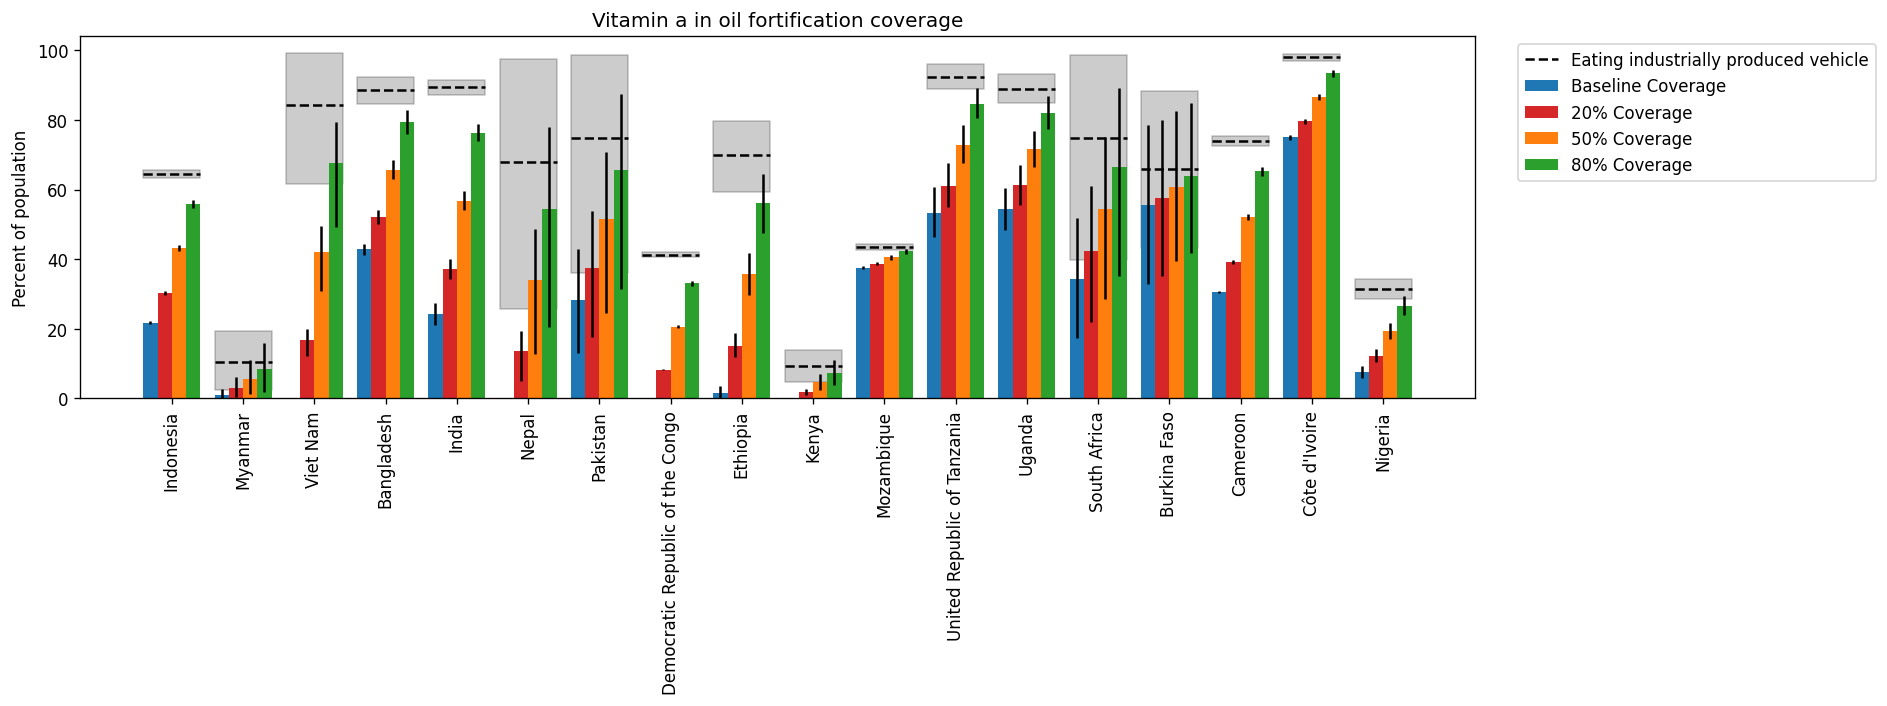

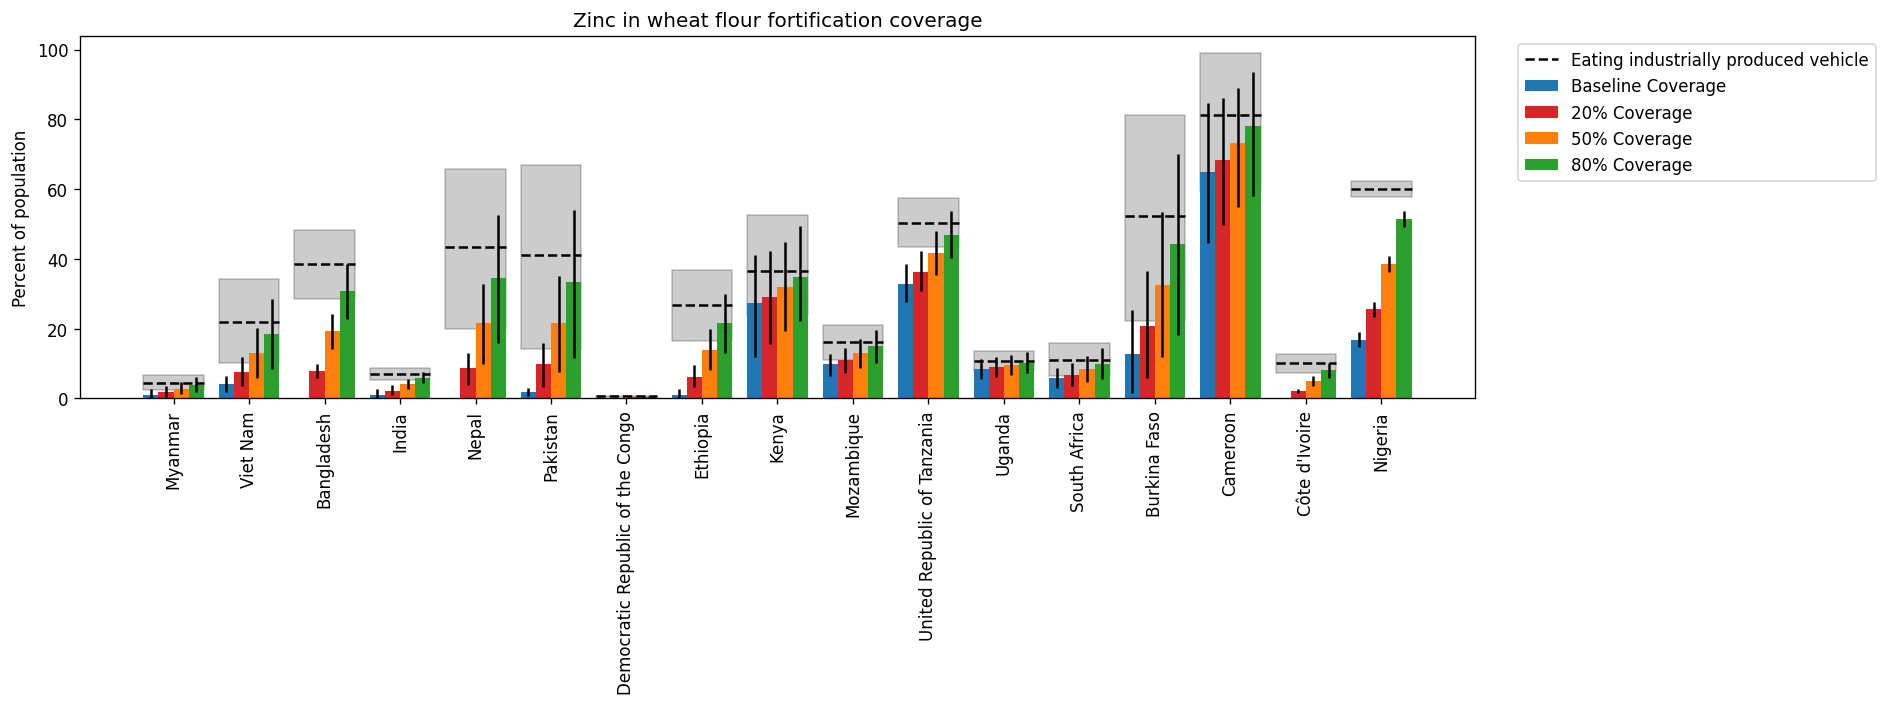

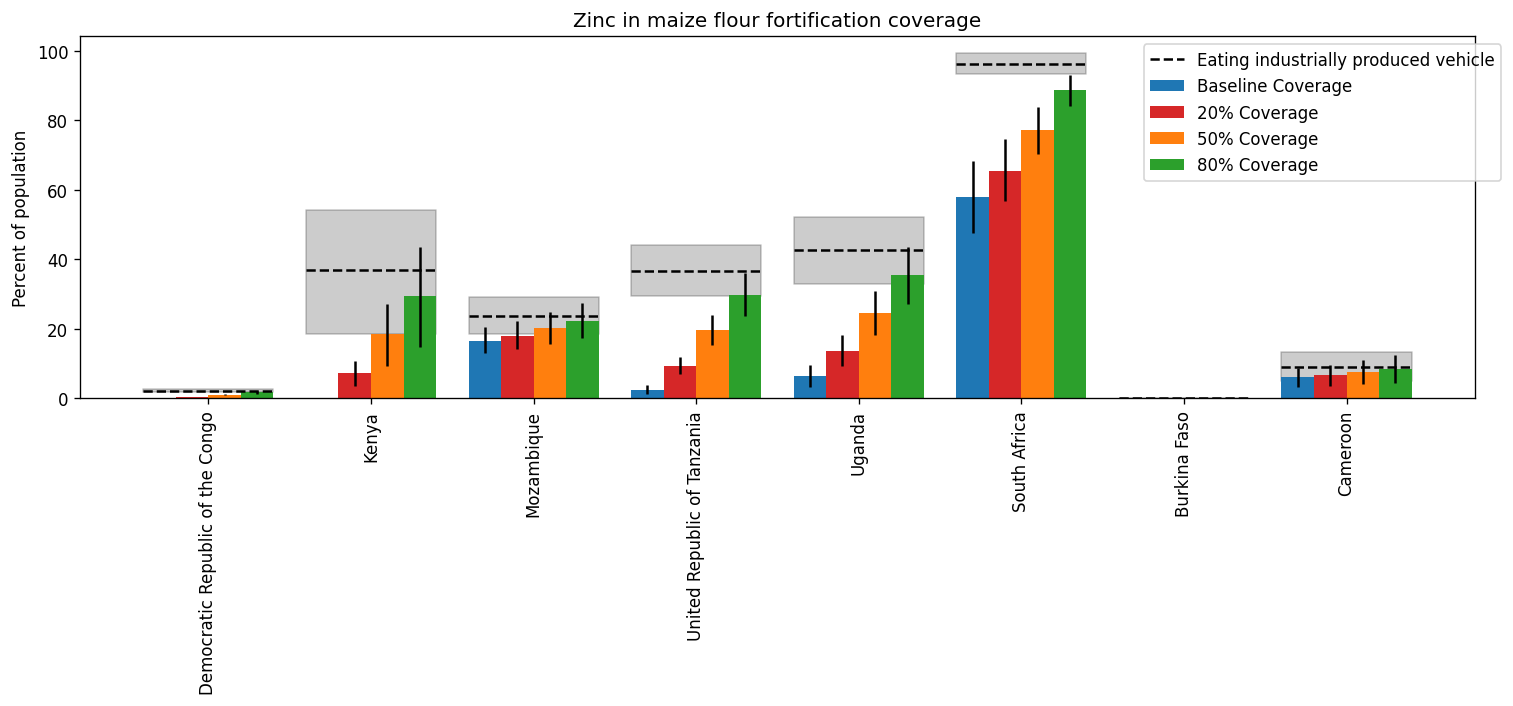

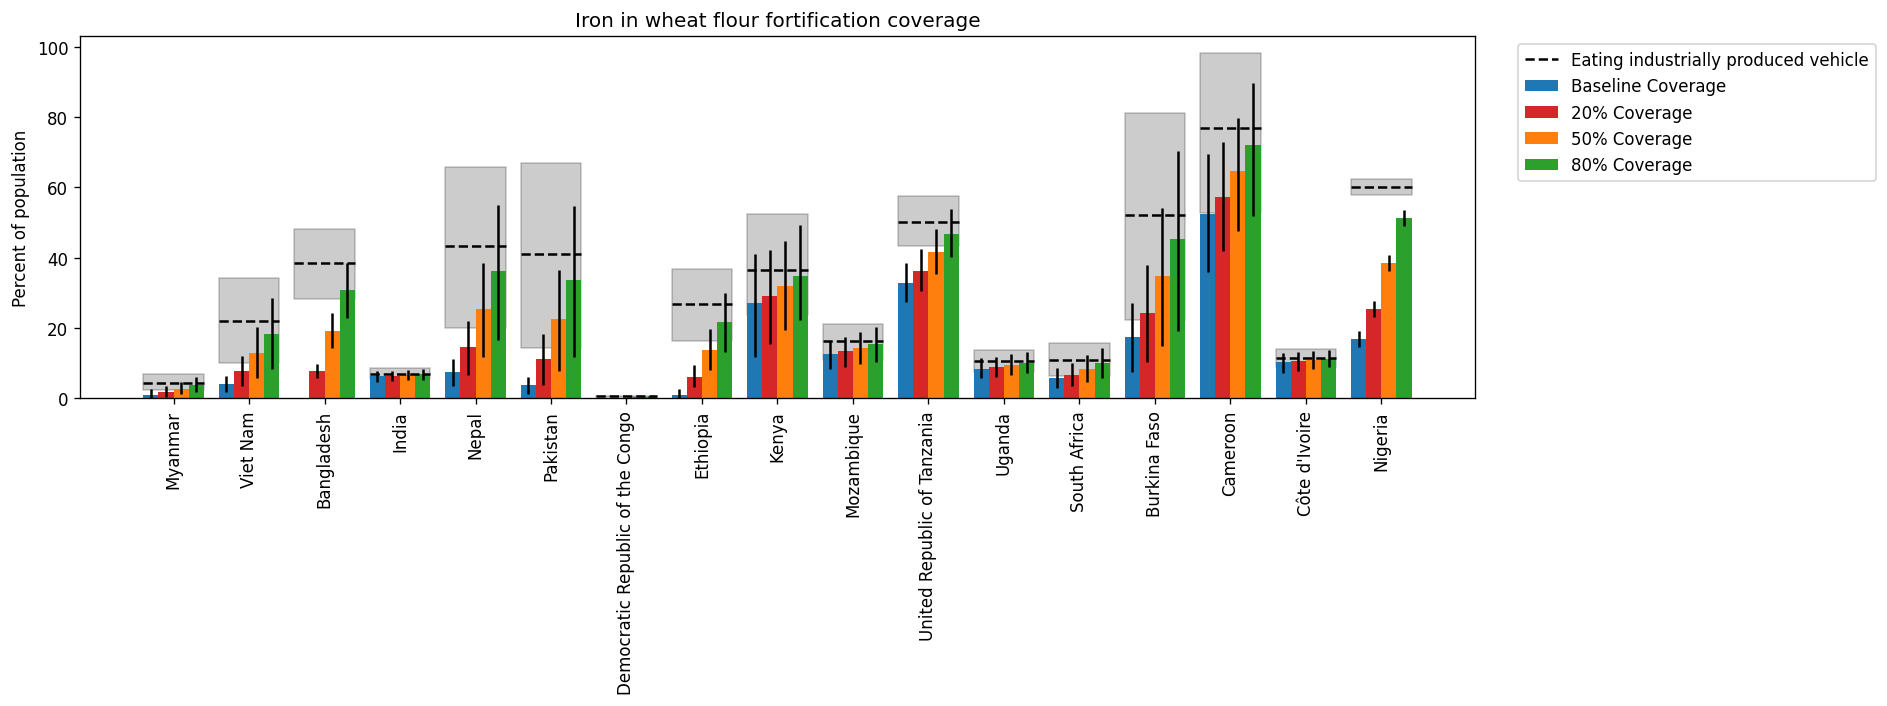

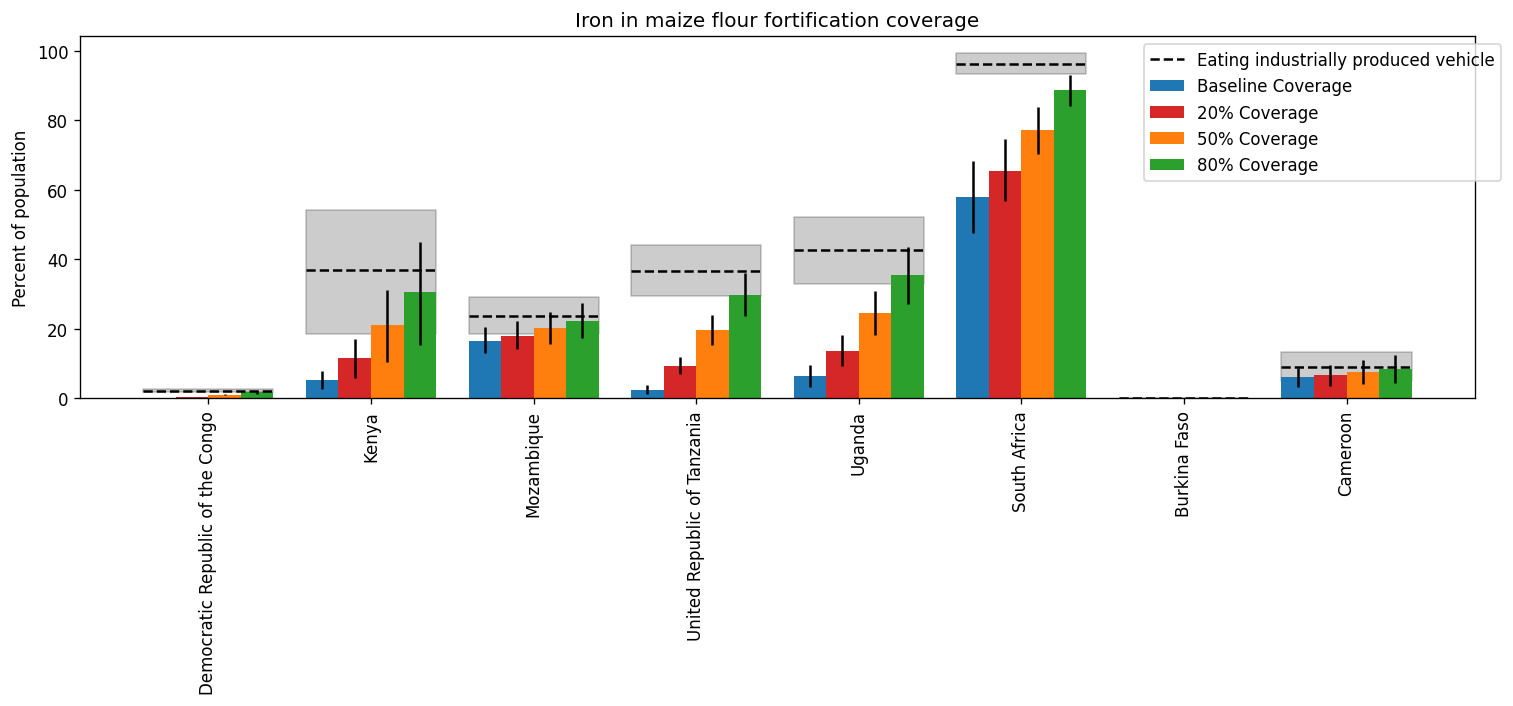

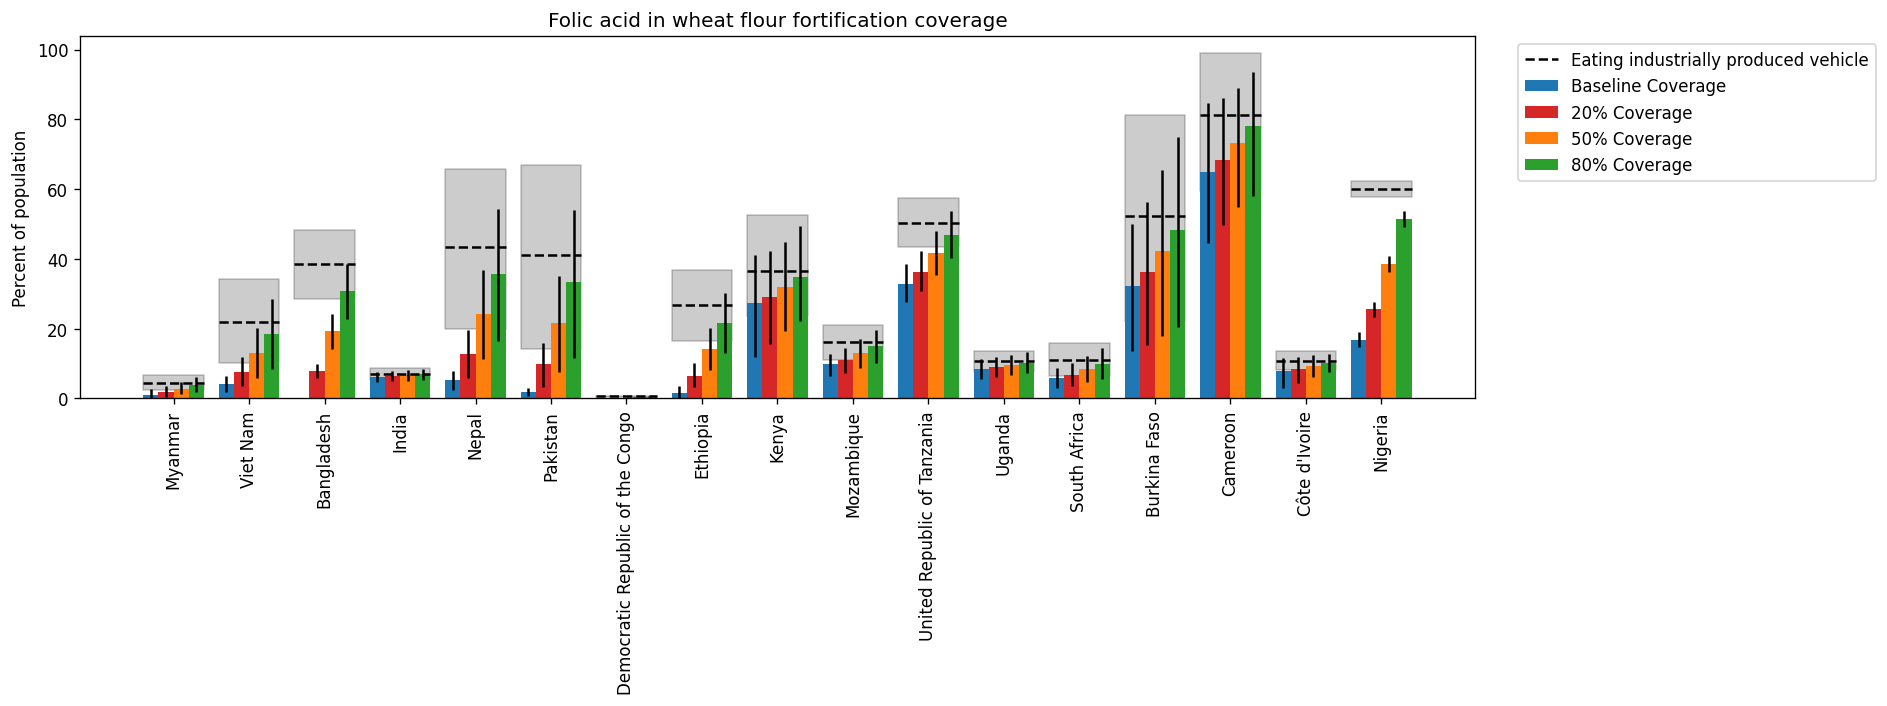

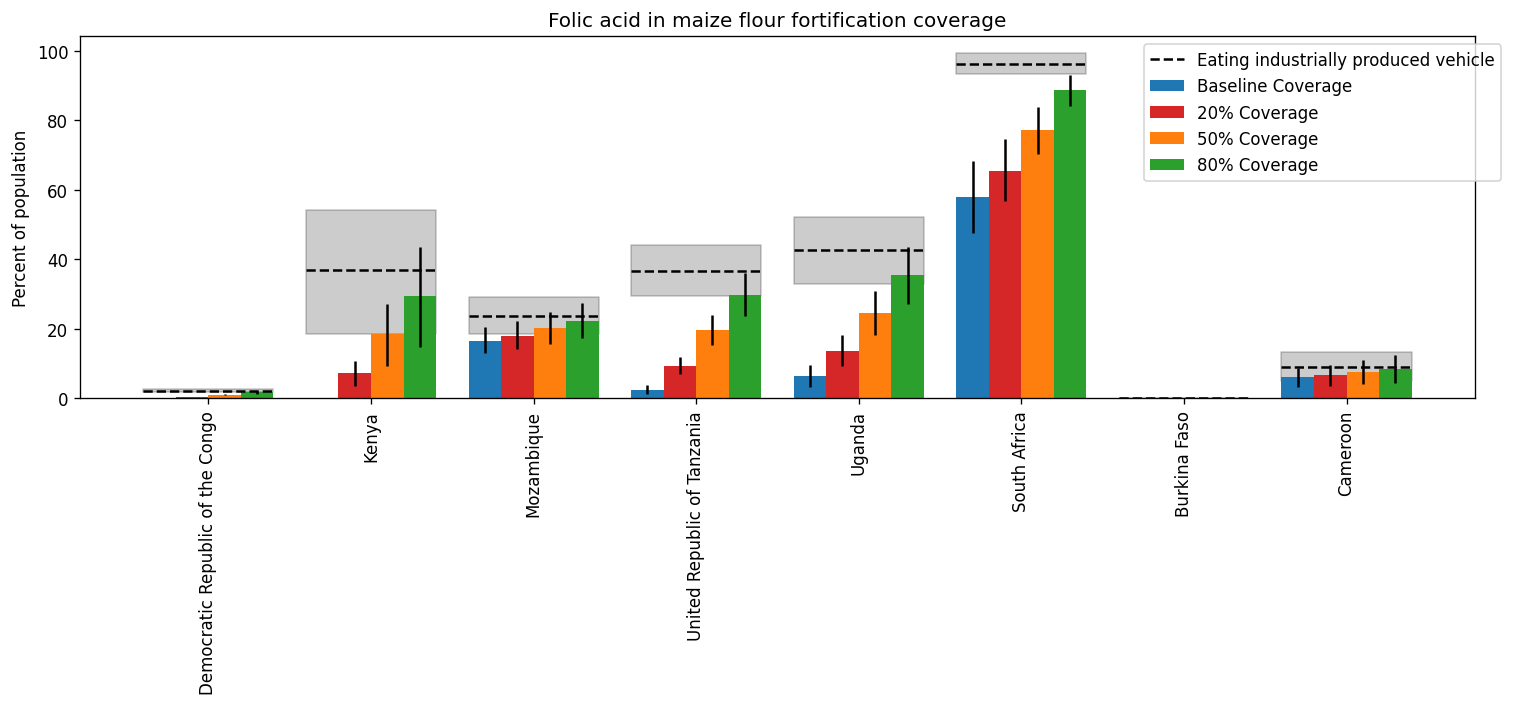

In [18]:
for nutrient in nutrients:
    if nutrient == 'vitamin a':
        vehicles = ['oil']
    else:
        vehicles = ['wheat flour', 'maize flour']
    for vehicle in vehicles:
        make_coverage_bar_charts(coverage_u5_summarized, location_ids, nutrient, vehicle)